Epoch 0: Loss = 10.1533, w = 0.1367, b = 0.0613
Epoch 20: Loss = 0.1289, w = 1.1222, b = 0.5186
Epoch 40: Loss = 0.0359, w = 1.2086, b = 0.5791
Epoch 60: Loss = 0.0331, w = 1.2097, b = 0.6011
Epoch 80: Loss = 0.0313, w = 1.2030, b = 0.6186


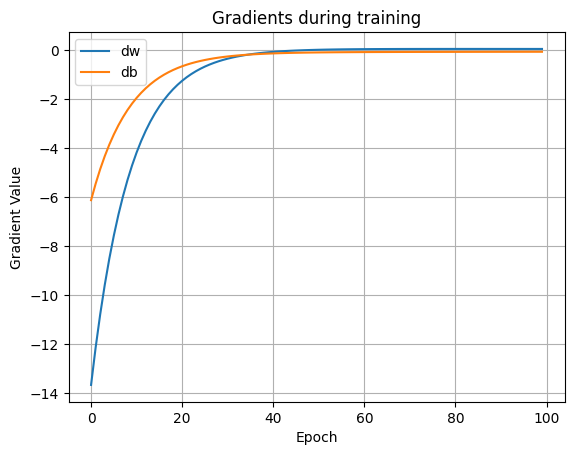

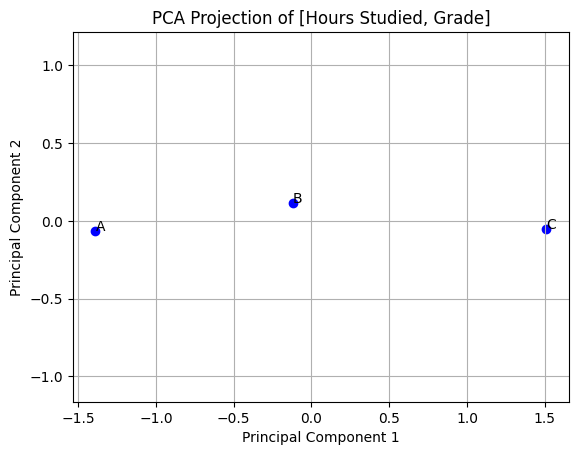

Explained variance ratio: [0.99535759 0.00464241]
Principal components:
 [[ 0.68606518  0.72754008]
 [ 0.72754008 -0.68606518]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# === Data ===
students = ['A', 'B', 'C']
X = np.array([[1], [2], [3]])  # Hours studied
y = np.array([[2.1], [2.9], [4.2]])  # Grades

# Neural network analysis

# Initialize weights
w = 0.0
b = 0.0
lr = 0.01
epochs = 100

# To track gradient values
w_grads = []
b_grads = []

# Gradient descent loop
for epoch in range(epochs):
    y_pred = w * X + b
    error = y_pred - y
    loss = np.mean(error**2)

    # Compute gradients 
    dw = np.mean(2 * error * X)
    db = np.mean(2 * error)

    w_grads.append(dw)
    b_grads.append(db)

    # Gradient update
    w -= lr * dw
    b -= lr * db

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Plot gradients
plt.plot(w_grads, label='dw')
plt.plot(b_grads, label='db')
plt.title('Gradients during training')
plt.xlabel('Epoch')
plt.ylabel('Gradient Value')
plt.legend()
plt.grid(True)
plt.show()

# PCA analysis

# Stack features and output for PCA
data = np.hstack([X, y])  # shape (3, 2)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)

# Project data
projected = pca.transform(data)

# Plot PCA results
plt.scatter(projected[:, 0], projected[:, 1], c='blue')
for i, name in enumerate(students):
    plt.text(projected[i, 0], projected[i, 1], name)
plt.title('PCA Projection of [Hours Studied, Grade]')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axis('equal')
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components:\n", pca.components_)